# IRIS Flower CLASSIFICATION

CodSoft Data Science internship Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("IRIS.csv")

In [3]:
data.shape

(150, 5)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### There is no null data

# Data PreProcessing

In [7]:
data.duplicated().sum()

3

In [8]:
data.drop_duplicates(subset=None,keep='first',inplace=True,ignore_index=False)

In [9]:
data.shape

(147, 5)

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

we have three type of flowers species

In [14]:
data['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

we have equal number of data of different species

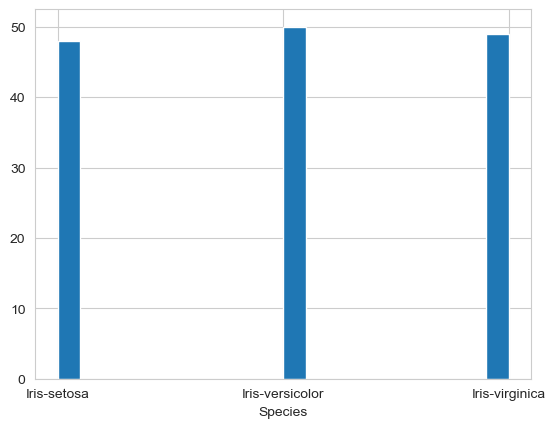

In [15]:
sns.set_style('whitegrid')
data['species'].hist(bins=20)
plt.xlabel('Species')
plt.show()

Text(0.5, 1.0, 'Distribution of Species')

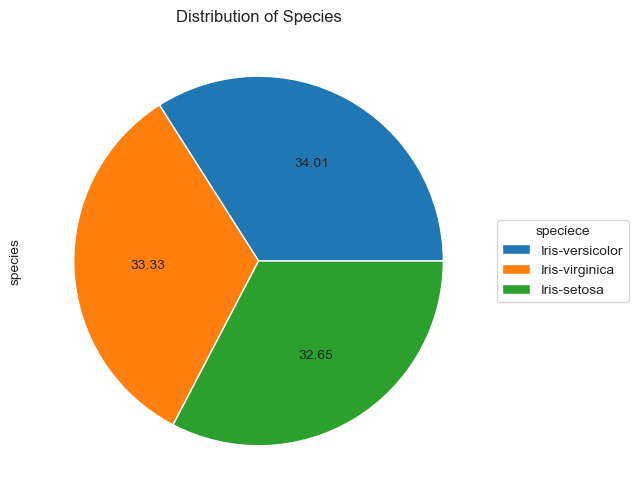

In [16]:
plt.figure(figsize=(6,6))
data['species'].value_counts().plot(kind='pie',autopct='%.2f',labels=None)
plt.legend(data['species'].value_counts().index,title="speciece",loc="center left",bbox_to_anchor=(1,0.5))
plt.title("Distribution of Species")

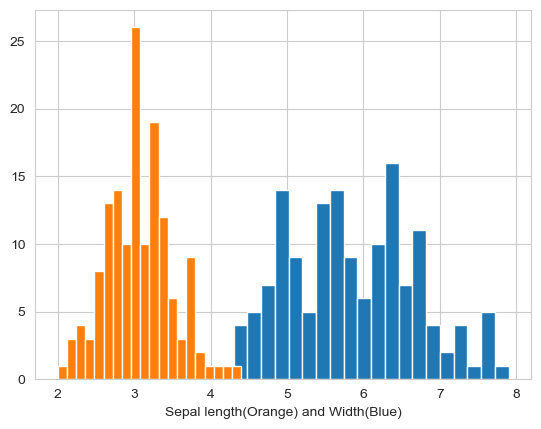

In [17]:
sns.set_style('whitegrid')
data['sepal_length'].hist(bins=20)
data['sepal_width'].hist(bins=20)
plt.xlabel('Sepal length(Orange) and Width(Blue)')
plt.show()

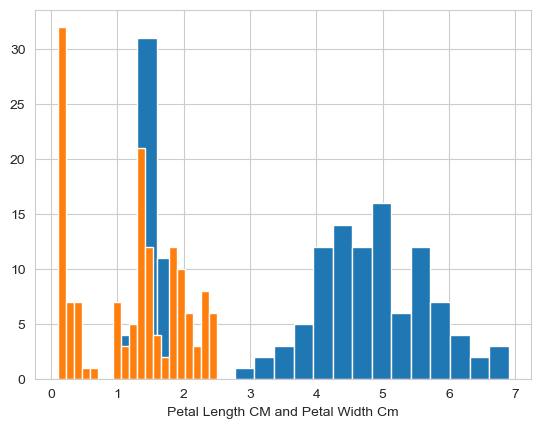

In [18]:
data['petal_length'].hist(bins=20)
data['petal_width'].hist(bins=20)
plt.xlabel('Petal Length CM and Petal Width Cm')
plt.show()

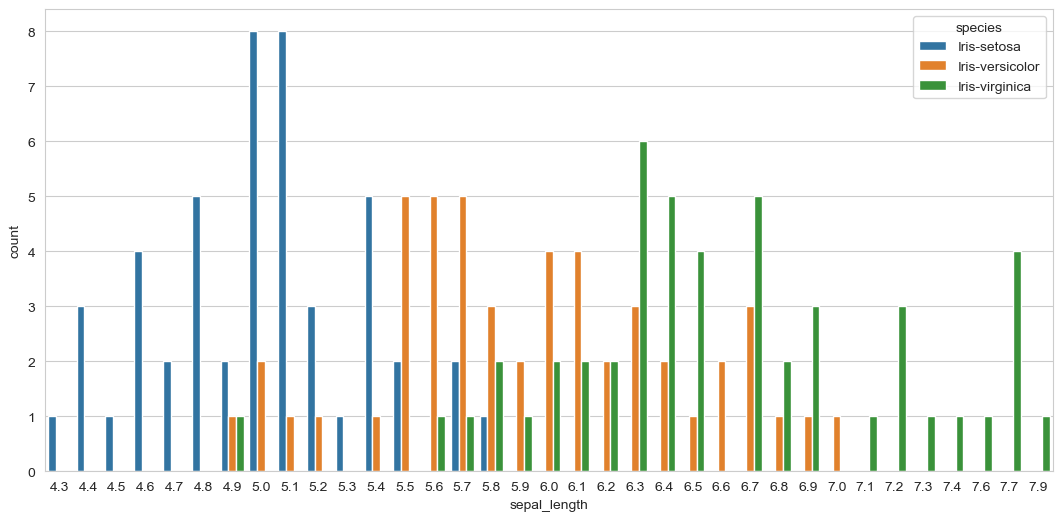

In [19]:
plt.figure(figsize=(13,6))
sns.countplot(x='sepal_length',data=data,hue='species')
plt.show()

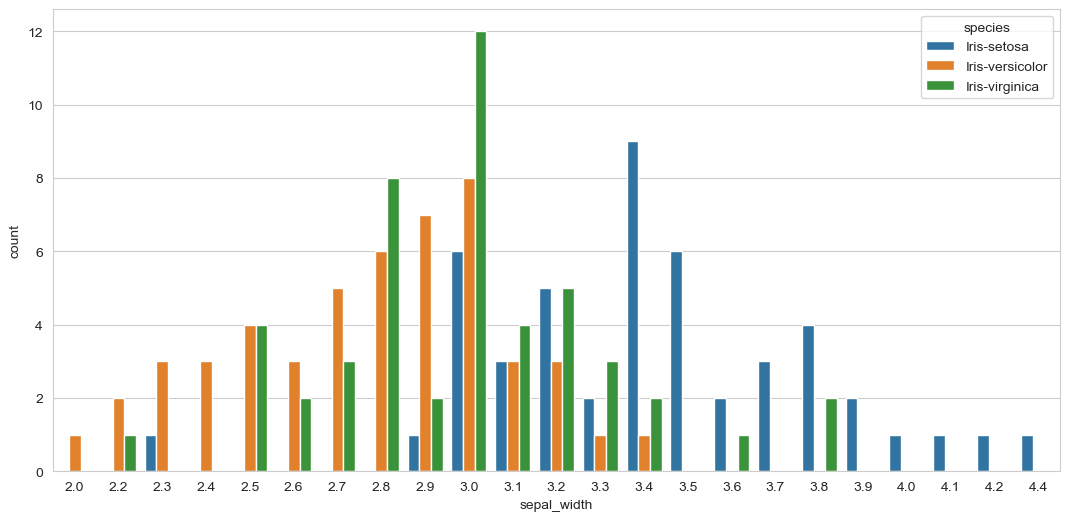

In [20]:
plt.figure(figsize=(13,6))
sns.countplot(x='sepal_width',data=data,hue='species')
plt.show()

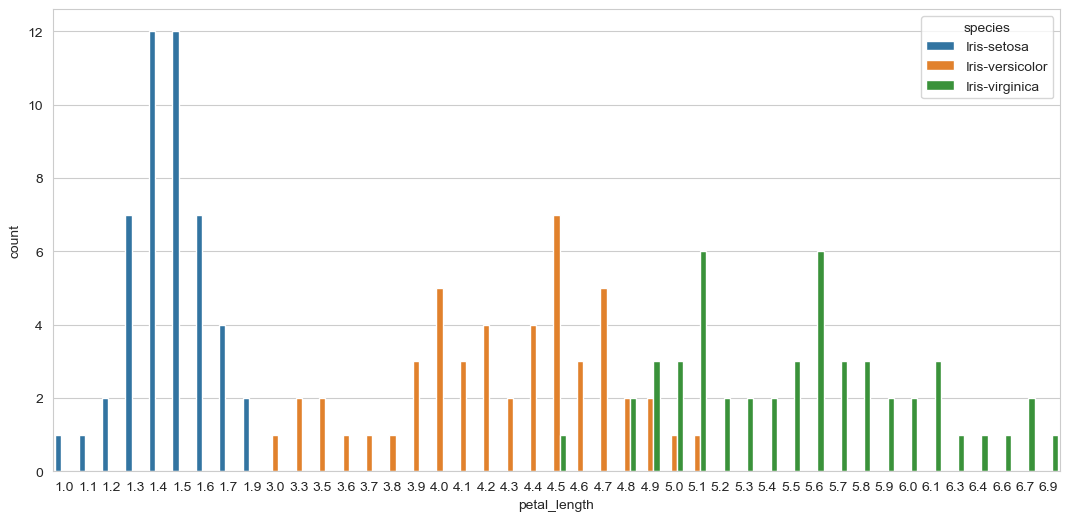

In [21]:
plt.figure(figsize=(13,6))
sns.countplot(x='petal_length',data=data,hue='species')
plt.show()

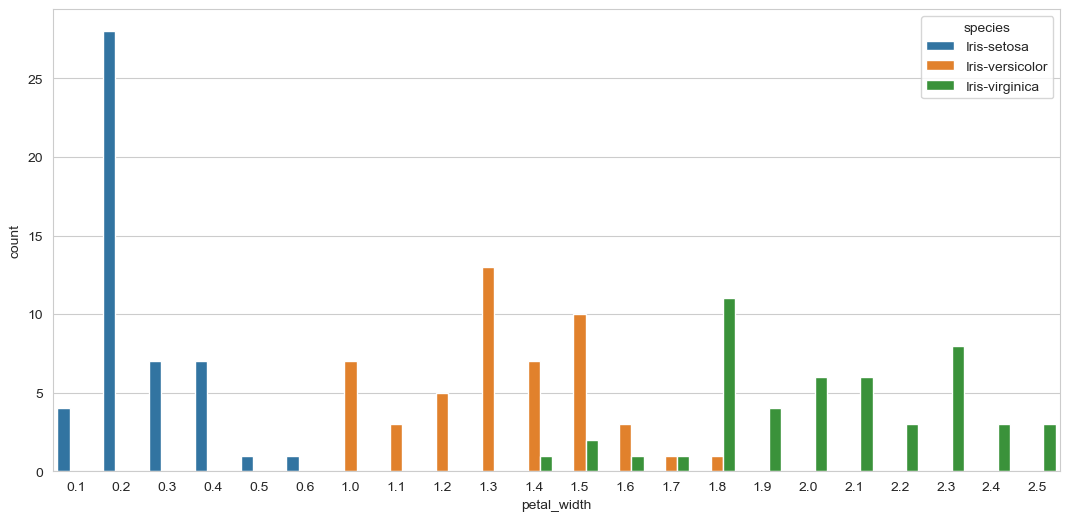

In [22]:
plt.figure(figsize=(13,6))
sns.countplot(x='petal_width',data=data,hue='species')
plt.show()

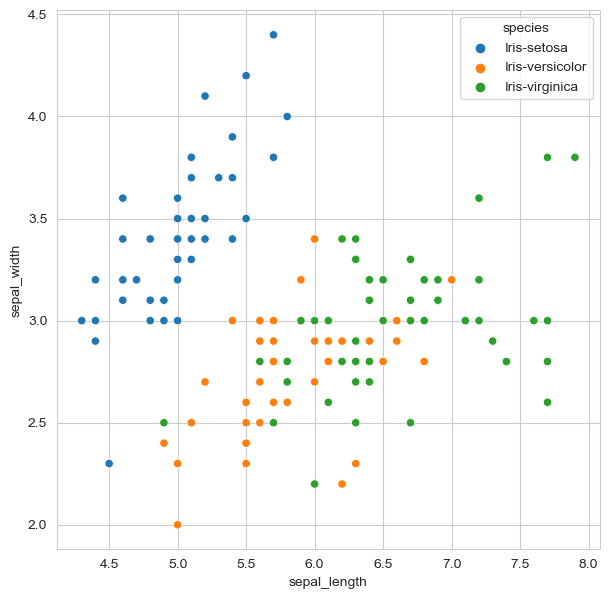

In [23]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='sepal_length',y='sepal_width',data=data,hue='species')
plt.show()

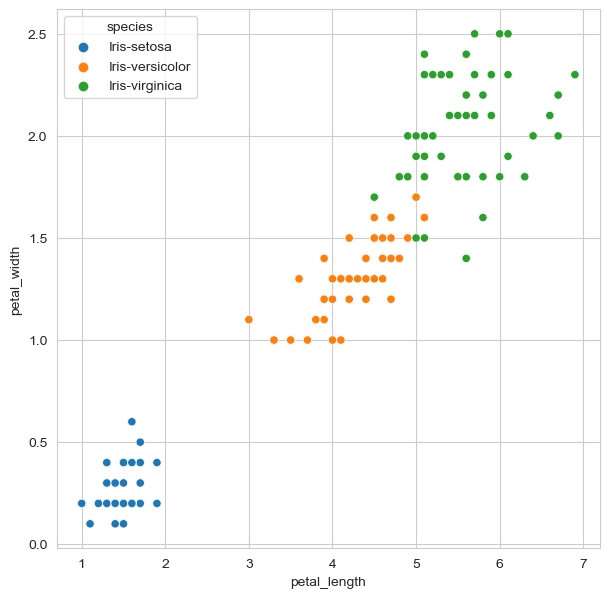

In [24]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="petal_length", y="petal_width", data=data, hue="species")
plt.show()

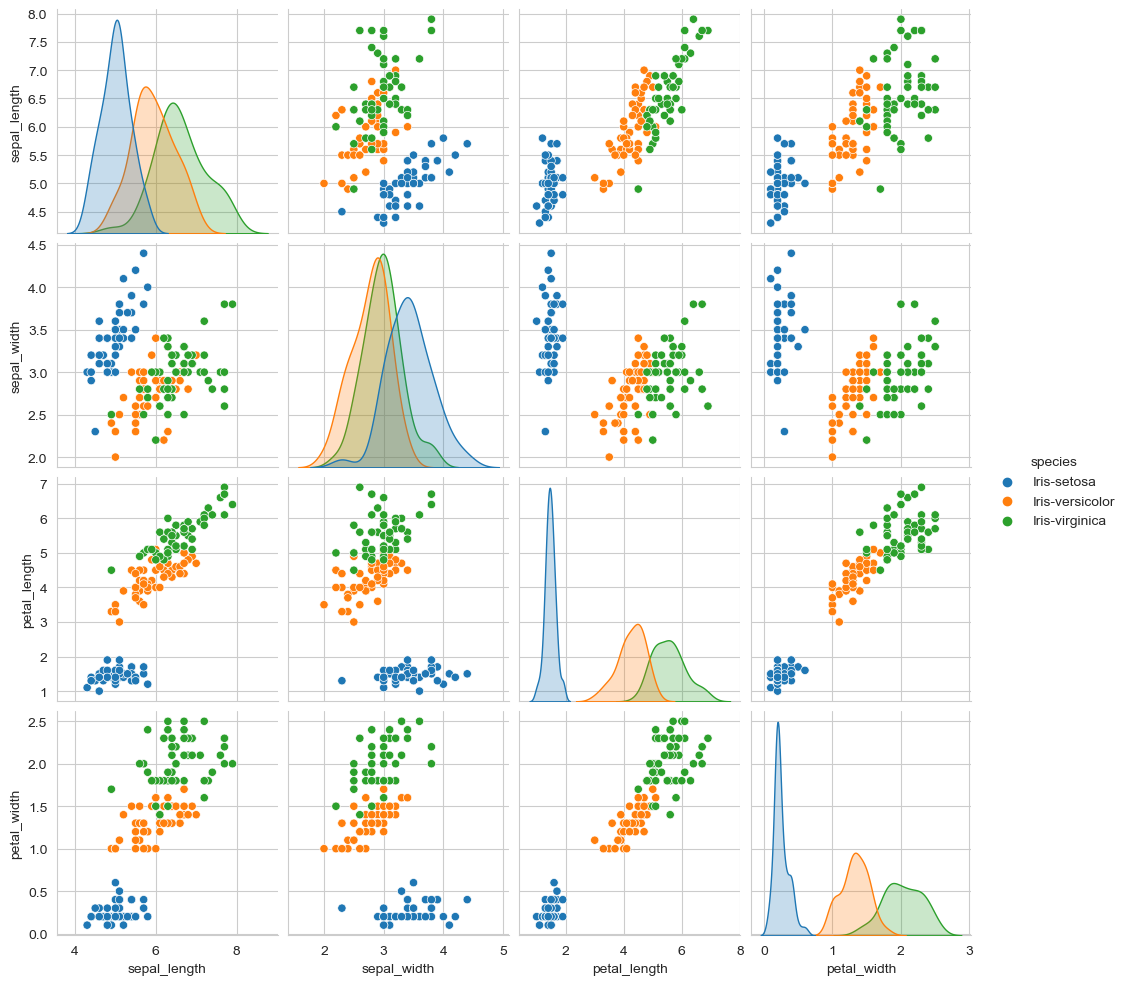

In [25]:
sns.pairplot(data,hue='species')
plt.show()

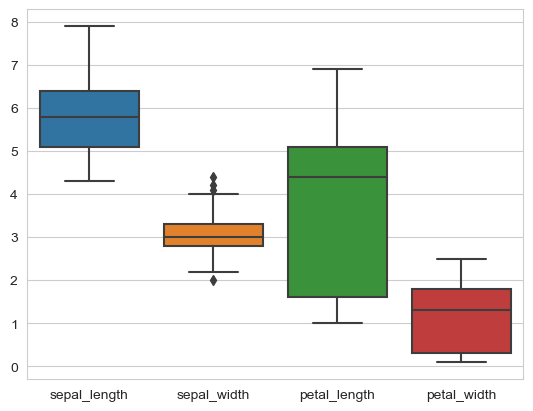

In [26]:
sns.boxplot(data=data)
plt.show()

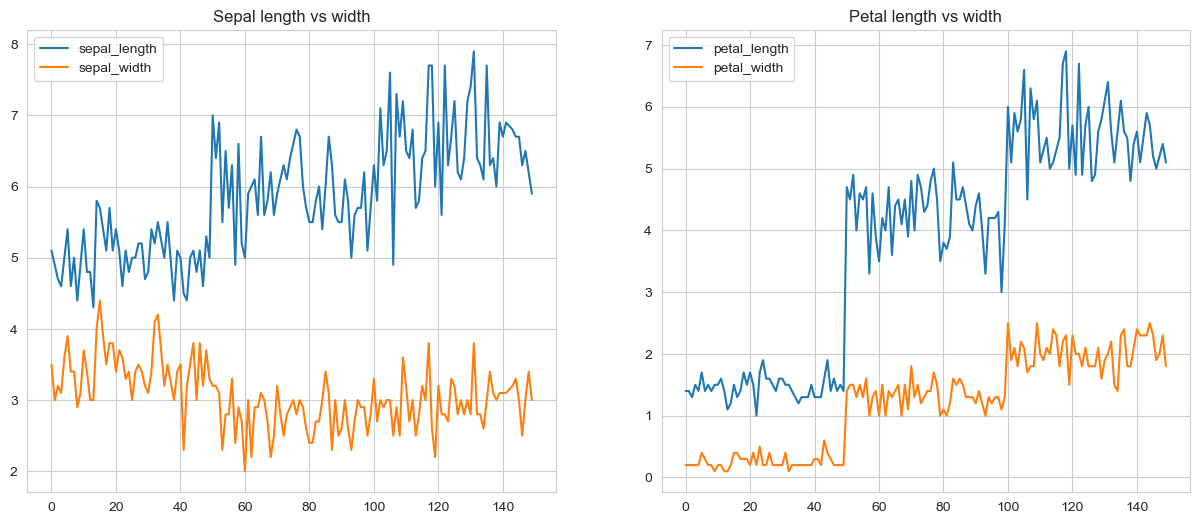

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(data['sepal_length'])
ax[0].plot(data['sepal_width'])
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(data['petal_length'])
ax[1].plot(data['petal_width'])
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

C:\Users\sam\AppData\Local\Temp\ipykernel_7856\3063979102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


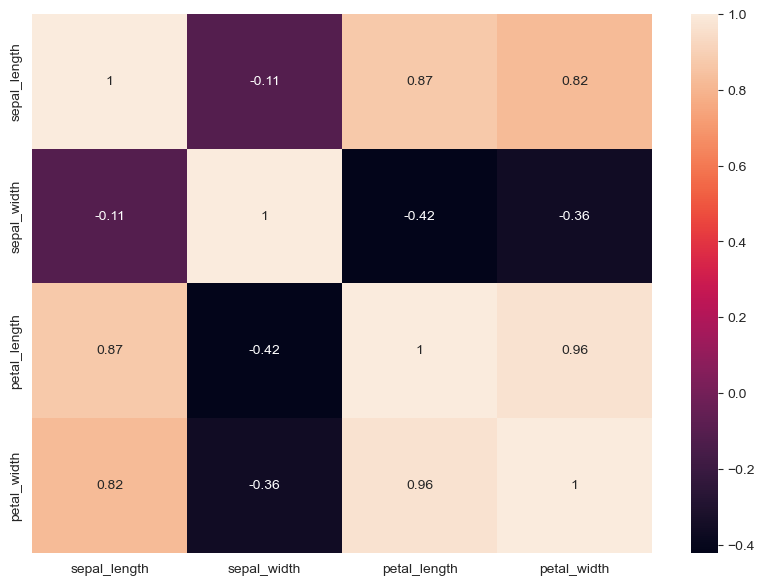

In [28]:
plt.figure(figsize=(10,7))
cor=data.corr()
sns.heatmap(cor,annot=True)
plt.show()

# Modeling

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X= data[['sepal_length','sepal_width','petal_length','petal_width']]
Y = data[['species']]

In [31]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

c:\Users\sam\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [35]:
print(classification_report(Y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.89      0.91        18

       accuracy                           0.94        49
      macro avg       0.93      0.94      0.93        49
   weighted avg       0.94      0.94      0.94        49



In [36]:
accuracy = accuracy_score(Y_test, y_pred)
logistic_accuracy=accuracy * 100
logistic_accuracy

93.87755102040816

### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
model2= GaussianNB()
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

c:\Users\sam\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
accuracy2 = accuracy_score(Y_test, y_pred2)
NaiveBayes_accuracy=accuracy2 * 100

In [39]:
print(classification_report(Y_test,y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        49
      macro avg       0.98      0.98      0.98        49
   weighted avg       0.98      0.98      0.98        49



In [40]:
NaiveBayes_accuracy

97.95918367346938

### K-Nearest Neighbours 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

c:\Users\sam\anaconda3\envs\tf_env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [42]:
print(classification_report(Y_test,y_pred3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.89      0.91        18

       accuracy                           0.94        49
      macro avg       0.93      0.94      0.93        49
   weighted avg       0.94      0.94      0.94        49



In [43]:
accuracy3 = accuracy_score(Y_test, y_pred3)
KNeighborsClassifier_accuracy=accuracy3 * 100
KNeighborsClassifier_accuracy

93.87755102040816

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

C:\Users\sam\AppData\Local\Temp\ipykernel_7856\2100882055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train,Y_train)


In [45]:
print(classification_report(Y_test,y_pred4))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        49
      macro avg       0.96      0.96      0.96        49
   weighted avg       0.96      0.96      0.96        49



In [46]:
accuracy4 = accuracy_score(Y_test, y_pred4)
RandomForest_accuracy=accuracy4 * 100
RandomForest_accuracy

95.91836734693877

### Support Vector Machine

In [47]:
from sklearn.svm import SVC
model5 = SVC(kernel='linear',C=0.025,random_state=101)
model5.fit(X_train,Y_train)
y_pred5 = model5.predict(X_test)

c:\Users\sam\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print(classification_report(Y_test,y_pred5))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.78      0.88        18

       accuracy                           0.92        49
      macro avg       0.92      0.93      0.91        49
   weighted avg       0.94      0.92      0.92        49



In [49]:
accuracy5 = accuracy_score(Y_test, y_pred5)
SVM_accuracy=accuracy5 * 100
SVM_accuracy

91.83673469387756

# Comparsion

In [50]:
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}%")
print(f"Naive Bayes Accuracy: {NaiveBayes_accuracy:.2f}%")
print(f"K-Nearest Neighbours Accuracy: {KNeighborsClassifier_accuracy:.2f}%")
print(f"Random Forest Accuracy: {RandomForest_accuracy:.2f}%")
print(f"Support Vector Machine Accuracy: {SVM_accuracy:.2f}%")

Logistic Regression Accuracy: 93.88%
Naive Bayes Accuracy: 97.96%
K-Nearest Neighbours Accuracy: 93.88%
Random Forest Accuracy: 95.92%
Support Vector Machine Accuracy: 91.84%


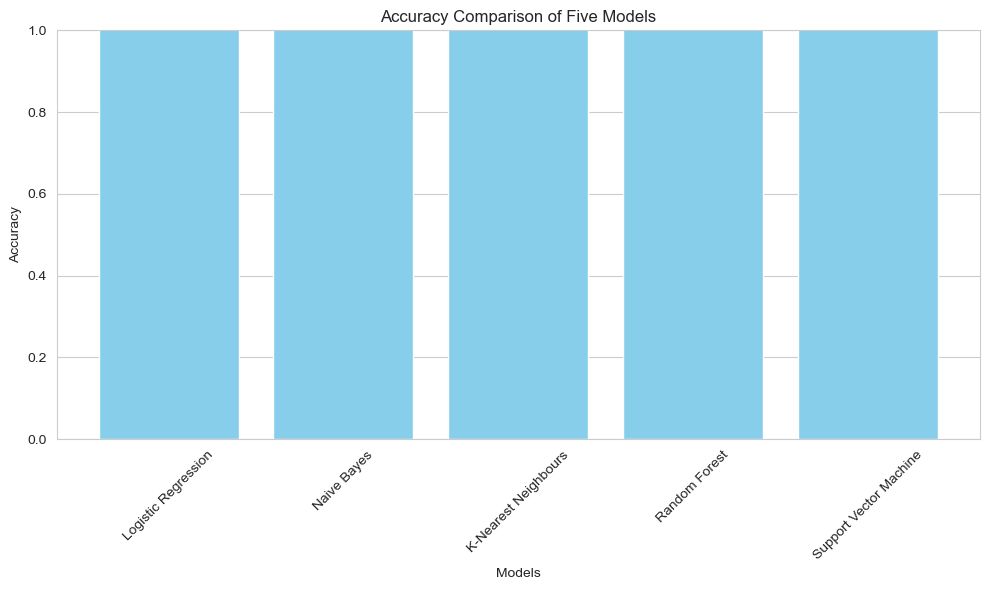

In [51]:
accuracies = [logistic_accuracy, NaiveBayes_accuracy, KNeighborsClassifier_accuracy, RandomForest_accuracy, SVM_accuracy]
model_names = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbours", "Random Forest", "Support Vector Machine"]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Five Models")
plt.ylim(0, 1.0) 
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


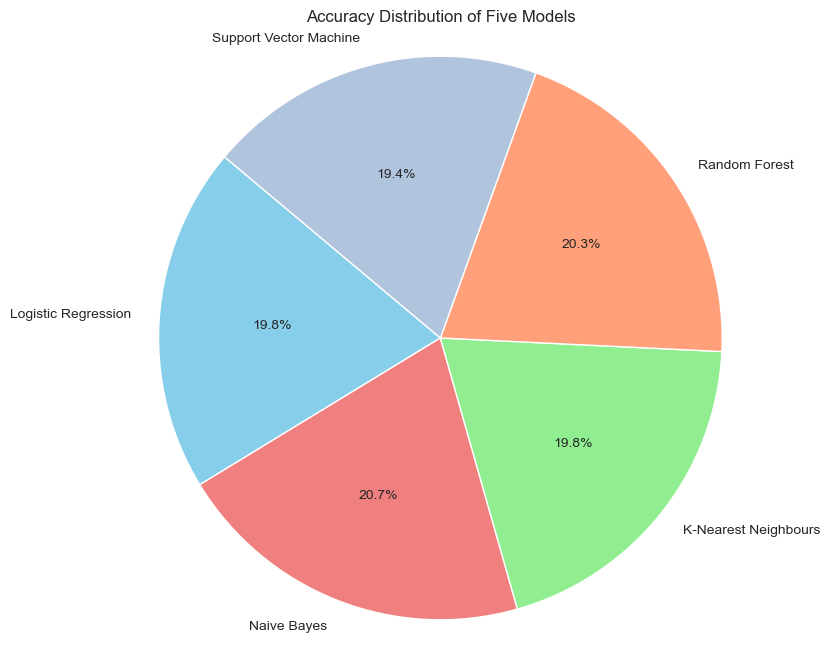

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=model_names, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightsteelblue'])
plt.title("Accuracy Distribution of Five Models")
plt.axis('equal') 
plt.show()

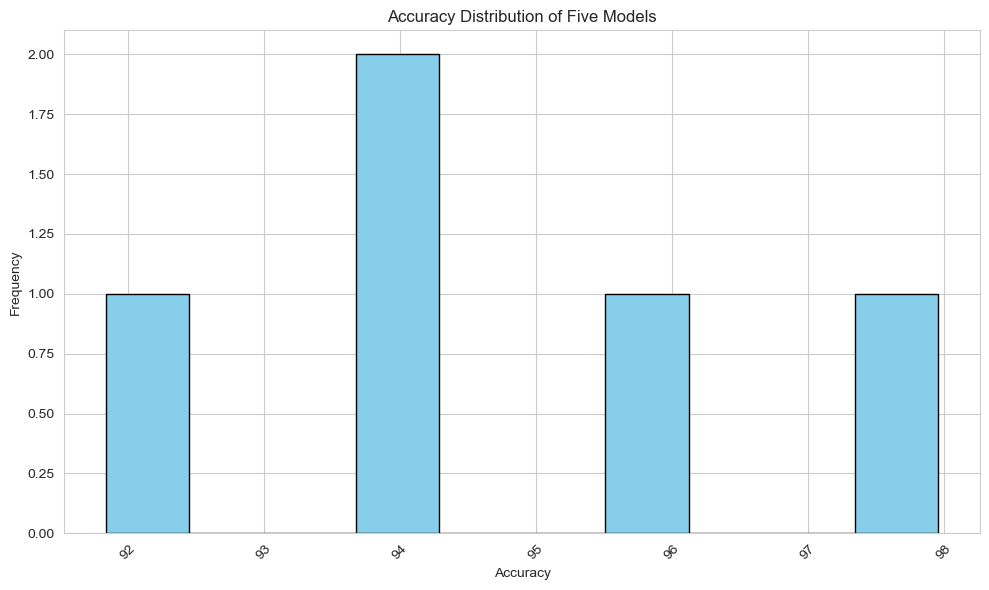

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Accuracy Distribution of Five Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Based on the analysis of this dataset, it is evident that the Naive Bayes classifier performs effectively and is a suitable choice for the given data.